sklearn.tree.DecisionTreeClassifier

sklearn.tree.ExtraTreeClassifier

sklearn.ensemble.ExtraTreesClassifier

sklearn.neighbors.KNeighborsClassifier

sklearn.neural_network.MLPClassifier

sklearn.neighbors.RadiusNeighborsClassifier

sklearn.ensemble.RandomForestClassifier

sklearn.linear_model.RidgeClassifierCV

In [20]:
import re    
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
import inflect
import contractions
from textblob import TextBlob
from bs4 import BeautifulSoup
import unicodedata
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer,PorterStemmer
from spellchecker import SpellChecker
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [26]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [27]:
train.shape , test.shape

((3235, 6), (1387, 5))

In [28]:
train.columns

Index(['id', 'original_text', 'lang', 'retweet_count', 'original_author',
       'sentiment_class'],
      dtype='object')

In [29]:
train.dtypes

id                 float64
original_text       object
lang                object
retweet_count       object
original_author     object
sentiment_class      int64
dtype: object

In [30]:
train.head(5)

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,en,1,FestiveFeeling,0
2,1.246087e+18,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,en,0,Queenuchee,0
4,1.244876e+18,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",en,0,brittan17446794,-1


In [31]:
train[train['sentiment_class'] == 0].head(5)

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,en,1,FestiveFeeling,0
3,1.244803e+18,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,en,0,Queenuchee,0
5,1.244524e+18,HAPPY MOTHER’S DAY! BRATZ WORLD FAMILIEZ YASMIN & HER MUM! (PORTIA) #bratz #bratzworldfamiliez #bratz2008 #bratzkidz #bratzyasmin #bratzportia #theonlygirlswithapassionforfashion #bratzdolls #brat...,en,0,chotia_mudit,0
9,1.245780e+18,"To all the mothers around the World, Gas To Health Initiative wishes them a Happy Mother's Day! - #gthi #mothersday2020 #MotheringSunday #MothersDay #lpg #motherhood #motherslove #gastohealth #arg...",en,0,LiveGoodProduct,0


In [32]:
train["sentiment_class"].value_counts()

 0    1701
-1     769
 1     765
Name: sentiment_class, dtype: int64

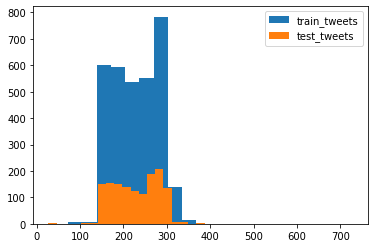

In [33]:
length_train = train['original_text'].str.len() 
length_test = test['original_text'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

combine both the train and test data

In [34]:
combi = train.append(test, ignore_index=True) 
combi.shape

C:\Users\DELL\Miniconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(4622, 6)

now removing different punctuations , stop words , twitter tags

In [35]:
def lower(text):
    words = text.split()
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return(" ".join(new_words))

In [36]:
combi['tidy_tweet'] = combi['original_text'].apply(lower)
combi.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class,tidy_tweet
0,1.245025e+18,en,BeenXXPired,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0,0.0,happy #mothersday to all you amazing mothers out there! i know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...
1,1.245759e+18,en,FestiveFeeling,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,1,0.0,happy mothers day mum - i'm sorry i can't be there to bring you mothers day flowers & a cwtch - honestly at this point i'd walk on hot coals to be able to. but i'll be there with bells on as soon ...
2,1.246087e+18,en,KrisAllenSak,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",0,-1.0,"happy mothers day to all this doing a mothers days work. today been quiet but had time to reflect. dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ..."
3,1.244803e+18,en,Queenuchee,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0,0.0,happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #prayforroksie #ultimateloveng pic.twitter.com/oeeti22pvv
4,1.244876e+18,en,brittan17446794,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",0,-1.0,"remembering the 3 most amazing ladies who made me who i am! my late grandmother iris, mum carol and great grandmother ethel. missed but never forgotten! happy mothers day to all those great mums o..."


In [37]:
def remove_urls(raw_text):
    raw_text=raw_text.strip()
    no_ment =re.sub(r'@\w+', '',raw_text )
    link = re.sub(r'https?:\/\/?.*[\r\n]*','',no_ment)
    new_word = re.sub(r'[!"#$%&\'()*+,-./:;<=>?@^_{|}~]', '', link)
    no_urls1 = re.sub(r'pic.*[\r\n]*','',new_word)
    try:
        no_encoding=no_urls1.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        no_encoding = no_urls1
    return(no_urls1)

In [38]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(remove_urls)
combi.head(5)

,id,lang,original_author,original_text,retweet_count,sentiment_class,tidy_tweet
0,1.245025e+18,en,BeenXXPired,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0,0.0,happy mothersday to all you amazing mothers out there i know its hard not being able to see your mothers today but its on all of us to do what we can to protect the most vulnerable members of our ...
1,1.245759e+18,en,FestiveFeeling,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,1,0.0,happy mothers day mum im sorry i cant be there to bring you mothers day flowers a cwtch honestly at this point id walk on hot coals to be able to but ill be there with bells on as soon as i can...
2,1.246087e+18,en,KrisAllenSak,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",0,-1.0,happy mothers day to all this doing a mothers days work today been quiet but had time to reflect dog walk finish a jigsaw do the garden learn few more guitar chords drunk some strawberry gin and t...
3,1.244803e+18,en,Queenuchee,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0,0.0,happy mothers day to this beautiful womanroyalty soothes you mummy jeremy and emerald and more prayforroksie ultimateloveng
4,1.244876e+18,en,brittan17446794,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",0,-1.0,remembering the 3 most amazing ladies who made me who i am my late grandmother iris mum carol and great grandmother ethel missed but never forgotten happy mothers day to all those great mums out t...


In [39]:
def denoise_text(text):
    # Strip html if any. For ex. removing <html>, <p> tags
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    # Replace contractions in the text. For ex. didn't -> did not
    text = contractions.fix(text)
    return text

In [40]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(denoise_text)
combi.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class,tidy_tweet
0,1.245025e+18,en,BeenXXPired,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0,0.0,happy mothersday to all you amazing mothers out there i know its hard not being able to see your mothers today but its on all of us to do what we can to protect the most vulnerable members of our ...
1,1.245759e+18,en,FestiveFeeling,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,1,0.0,happy mothers day mum I am sorry i can not be there to bring you mothers day flowers a cwtch honestly at this point id walk on hot coals to be able to but I will be there with bells on as soon ...
2,1.246087e+18,en,KrisAllenSak,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",0,-1.0,happy mothers day to all this doing a mothers days work today been quiet but had time to reflect dog walk finish a jigsaw do the garden learn few more guitar chords drunk some strawberry gin and t...
3,1.244803e+18,en,Queenuchee,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0,0.0,happy mothers day to this beautiful womanroyalty soothes you mummy jeremy and emerald and more prayforroksie ultimateloveng
4,1.244876e+18,en,brittan17446794,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",0,-1.0,remembering the 3 most amazing ladies who made me who i am my late grandmother iris mum carol and great grandmother ethel missed but never forgotten happy mothers day to all those great mums out t...


In [41]:
def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    words = text.split()
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return(" ".join(new_words))

In [42]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(replace_numbers)
combi.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class,tidy_tweet
0,1.245025e+18,en,BeenXXPired,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0,0.0,happy mothersday to all you amazing mothers out there i know its hard not being able to see your mothers today but its on all of us to do what we can to protect the most vulnerable members of our ...
1,1.245759e+18,en,FestiveFeeling,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,1,0.0,happy mothers day mum I am sorry i can not be there to bring you mothers day flowers a cwtch honestly at this point id walk on hot coals to be able to but I will be there with bells on as soon as ...
2,1.246087e+18,en,KrisAllenSak,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",0,-1.0,happy mothers day to all this doing a mothers days work today been quiet but had time to reflect dog walk finish a jigsaw do the garden learn few more guitar chords drunk some strawberry gin and t...
3,1.244803e+18,en,Queenuchee,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0,0.0,happy mothers day to this beautiful womanroyalty soothes you mummy jeremy and emerald and more prayforroksie ultimateloveng
4,1.244876e+18,en,brittan17446794,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",0,-1.0,remembering the three most amazing ladies who made me who i am my late grandmother iris mum carol and great grandmother ethel missed but never forgotten happy mothers day to all those great mums o...


In [21]:
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [22]:
%%time
combi['tidy_tweet'] = combi['tidy_tweet'].apply(correct_spellings)
combi.head()

KeyboardInterrupt: 

In [43]:
def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    words = input_text.split()
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no",'three']
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return(" ".join(clean_words))

In [44]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(remove_stopwords)
combi.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class,tidy_tweet
0,1.245025e+18,en,BeenXXPired,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0,0.0,happy mothersday amazing mothers know hard not able see mothers today us protect vulnerable members society beatcoronavirus
1,1.245759e+18,en,FestiveFeeling,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,1,0.0,happy mothers day mum sorry not bring mothers day flowers cwtch honestly point id walk hot coals able bells soon love lots xxx ps need photos
2,1.246087e+18,en,KrisAllenSak,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",0,-1.0,happy mothers day mothers days work today quiet time reflect dog walk finish jigsaw garden learn guitar chords drunk strawberry gin tonic watch lee evens dvd favourite place visit isolate
3,1.244803e+18,en,Queenuchee,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0,0.0,happy mothers day beautiful womanroyalty soothes mummy jeremy emerald prayforroksie ultimateloveng
4,1.244876e+18,en,brittan17446794,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",0,-1.0,remembering three amazing ladies made late grandmother iris mum carol great grandmother ethel missed never forgotten happy mothers day great mums love sent xxxx


In [32]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

In [45]:
def lemmatize_verbs(text):
    """Lemmatize verbs in list of tokenized words"""
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return(" ".join(lemmas))

In [46]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lemmatize_verbs)
combi.head()

,id,lang,original_author,original_text,retweet_count,sentiment_class,tidy_tweet
0,1.245025e+18,en,BeenXXPired,Happy #MothersDay to all you amazing mothers out there! I know it's hard not being able to see your mothers today but it's on all of us to do what we can to protect the most vulnerable members of ...,0,0.0,happy mothersday amaze mother know hard not able see mother today us protect vulnerable members society beatcoronavirus
1,1.245759e+18,en,FestiveFeeling,Happy Mothers Day Mum - I'm sorry I can't be there to bring you Mothers day flowers & a cwtch - honestly at this point I'd walk on hot coals to be able to. But I'll be there with bells on as soon ...,1,0.0,happy mother day mum sorry not bring mother day flower cwtch honestly point id walk hot coal able bell soon love lot xxx ps need photos
2,1.246087e+18,en,KrisAllenSak,"Happy mothers day To all This doing a mothers days work. Today been quiet but Had time to reflect. Dog walk, finish a jigsaw do the garden, learn few more guitar chords, drunk some strawberry gin ...",0,-1.0,happy mother day mother days work today quiet time reflect dog walk finish jigsaw garden learn guitar chord drink strawberry gin tonic watch lee even dvd favourite place visit isolate
3,1.244803e+18,en,Queenuchee,Happy mothers day to this beautiful woman...royalty soothes you mummy jeremy and emerald and more #PrayForRoksie #UltimateLoveNG pic.twitter.com/oeetI22Pvv,0,0.0,happy mother day beautiful womanroyalty soothe mummy jeremy emerald prayforroksie ultimateloveng
4,1.244876e+18,en,brittan17446794,"Remembering the 3 most amazing ladies who made me who I am! My late grandmother iris, mum carol and great grandmother Ethel. Missed but never forgotten! Happy mothers day to all those great mums o...",0,-1.0,remember three amaze ladies make late grandmother iris mum carol great grandmother ethel miss never forget happy mother day great mums love send xxxx


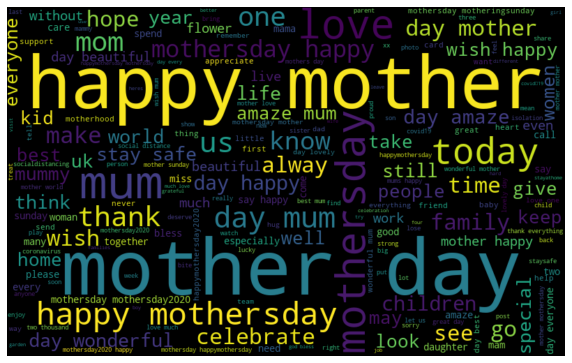

In [47]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

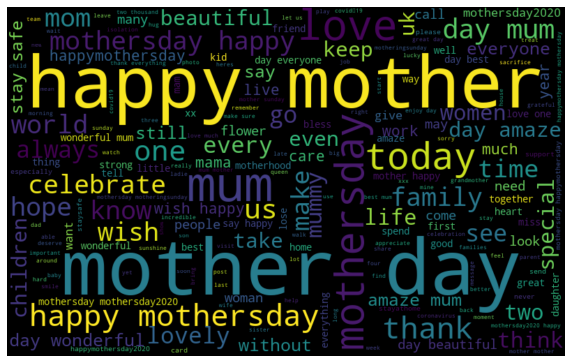

In [48]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment_class'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

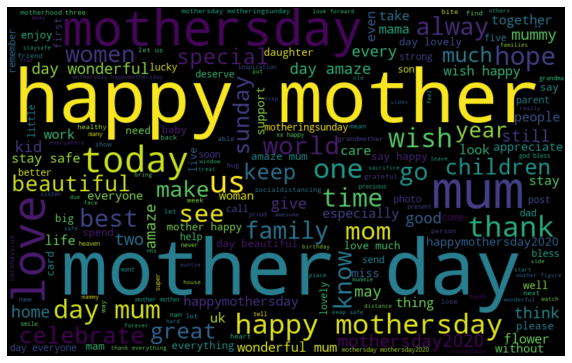

In [49]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment_class'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

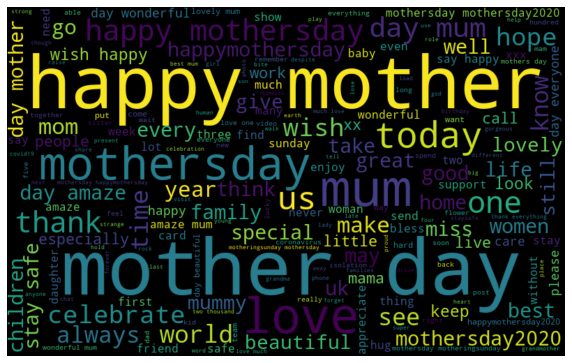

In [50]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['sentiment_class'] == -1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

extraction of the hashtags

In [39]:
def hashtag_extract(x):    
    hashtags = []    # Loop over the words in the tweet    
    for i in x:        
        ht = re.findall(r"#(\w+)", i)        
        hashtags.append(ht)     
    return hashtags

In [40]:
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['sentiment_class'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['sentiment_class'] == 1])

HT_nuetral = hashtag_extract(combi['tidy_tweet'][combi['sentiment_class'] == -1]) 

# unnesting list 
HT_regular = sum(HT_regular,[]) 
HT_negative = sum(HT_negative,[])
HT_nuetral = sum(HT_nuetral,[])

In [42]:
len(HT_negative),len(HT_nuetral),len(HT_regular)

(1740, 1737, 4054)

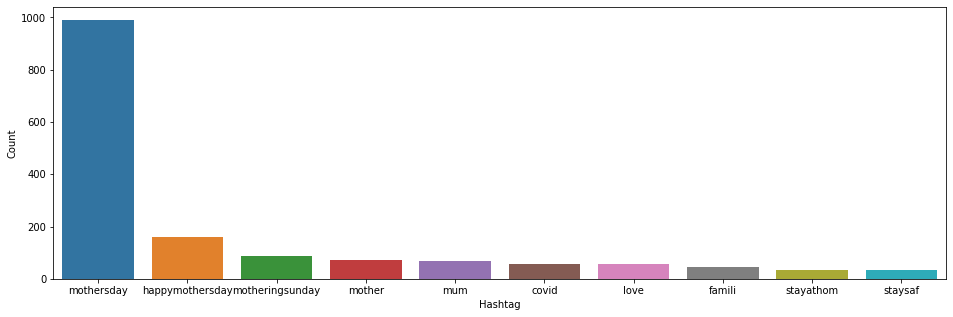

In [48]:
a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

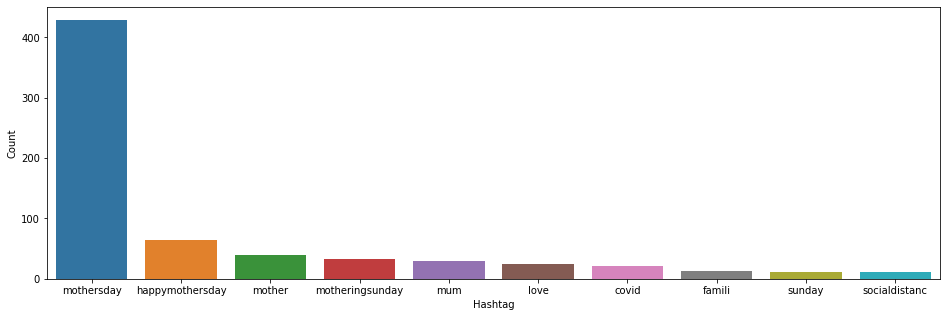

In [50]:
a = nltk.FreqDist(HT_negative) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count') 
plt.show()

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

C:\Users\DELL\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [52]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy_tweet']) 
bow.shape

(4622, 1000)

In [53]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet']) 
tfidf.shape

(4622, 1000)

In [54]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)
model_w2v.train(tokenized_tweet, total_examples= len(combi['tidy_tweet']), epochs=20)

(1059249, 1672080)

In [55]:
model_w2v.wv.most_similar(positive="mother")

[('day', 0.6860465407371521),
 ('mother’s', 0.6676884293556213),
 ('motherfigures', 0.6632757186889648),
 ('mumfigures', 0.6606653928756714),
 ('forgive', 0.6587553024291992),
 ('amotherslove', 0.6574594378471375),
 ('happy', 0.6549679636955261),
 ('postables', 0.6530218124389648),
 ('simplythebest', 0.6477000713348389),
 ('samba', 0.6466909646987915)]

In [56]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue   # handling the case where the token is not in vocabulary 
    if(count != 0):
        vec /= count
    return vec

In [57]:
%%time
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)     

Wall time: 2.02 s


In [58]:
wordvec_df.shape

(4622, 200)

In [59]:
wordvec_df.columns

RangeIndex(start=0, stop=200, step=1)

In [60]:
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

In [61]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

In [62]:
%%time 
labeled_tweets = add_label(tokenized_tweet)

Wall time: 40.9 ms


In [63]:
labeled_tweets[:6]

[LabeledSentence(words=['happy', 'mothersday', 'amaze', 'mother', 'know', 'hard', 'not', 'able', 'see', 'mother', 'today', 'us', 'protect', 'vulnerable', 'members', 'society', 'beatcoronavirus'], tags=['tweet_0']),
 LabeledSentence(words=['happy', 'mother', 'day', 'mum', 'sorry', 'not', 'bring', 'mother', 'day', 'flower', 'cwtch', 'honestly', 'point', 'id', 'walk', 'hot', 'coal', 'able', 'bell', 'soon', 'love', 'lot', 'xxx', 'ps', 'need', 'photos'], tags=['tweet_1']),
 LabeledSentence(words=['happy', 'mother', 'day', 'mother', 'days', 'work', 'today', 'quiet', 'time', 'reflect', 'dog', 'walk', 'finish', 'jigsaw', 'garden', 'learn', 'guitar', 'chord', 'drink', 'strawberry', 'gin', 'tonic', 'watch', 'lee', 'even', 'dvd', 'favourite', 'place', 'visit', 'isolate'], tags=['tweet_2']),
 LabeledSentence(words=['happy', 'mother', 'day', 'beautiful', 'womanroyalty', 'soothe', 'mummy', 'jeremy', 'emerald', 'prayforroksie', 'ultimateloveng'], tags=['tweet_3']),
 LabeledSentence(words=['remember',

In [64]:
%%time
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model                                   
dm_mean=1, # dm = 1 for using mean of the context word vectors                                  
size=200, # no. of desired features                                  
window=5, # width of the context window                                  
negative=7, # if > 0 then negative sampling will be used                                 
min_count=5, # Ignores all words with total frequency lower than 2.                                  
workers=3, # no. of cores                                  
alpha=0.1, # learning rate                                  
seed = 23) 
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])
model_d2v.train(labeled_tweets, total_examples= len(combi['tidy_tweet']), epochs=15)

C:\Users\DELL\Miniconda3\lib\site-packages\gensim\models\doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|█████████████████████████████████████████████████████████████████████████| 4622/4622 [00:00<00:00, 1544460.89it/s]


Wall time: 5.07 s


In [65]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(4622, 200)

In [66]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
train_bow = bow[:3235,:] 
test_bow = bow[3235:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)

In [67]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)

C:\Users\DELL\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Wall time: 12.3 s


In [68]:
f1_score(yvalid, prediction,average='weighted')

0.3987231216138177

In [69]:
test_pred = rf.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_bow.csv', index=False)

using tfidf and randomforest

In [70]:
%%time 
train_bow = tfidf[:3235,:] 
test_bow = tfidf[3235:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)

rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)

Wall time: 8.01 s


In [71]:
f1_score(yvalid, prediction,average='weighted')

0.3800803085913749

In [72]:
test_pred = rf.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_tfidf.csv', index=False)

using word2vec and random forest

In [73]:
%%time 
train_bow = wordvec_df.iloc[:3235,:] 
test_bow = wordvec_df.iloc[3235:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)
rf = RandomForestClassifier(n_estimators=400, random_state=11,verbose=1).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   16.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


Wall time: 17.4 s


In [74]:
f1_score(yvalid, prediction,average='weighted')

0.35530696329963596

In [75]:
test_pred = rf.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_wordvecdf.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


using doc2vec and random forest

In [76]:
%%time 
train_bow = docvec_df.iloc[:3235,:] 
test_bow = docvec_df.iloc[3235:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)
rf = RandomForestClassifier(n_estimators=400, random_state=11,verbose=1).fit(xtrain_bow, ytrain) 
prediction = rf.predict(xvalid_bow)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:   15.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.0s finished


Wall time: 16.2 s


In [77]:
f1_score(yvalid, prediction,average='weighted')

0.3417300171503922

In [78]:
test_pred = rf.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_rf_doc2vec.csv', index=False)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    0.1s finished


In [80]:
from xgboost import XGBClassifier
train_bow = bow[:3235,:] 
test_bow = bow[3235:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['sentiment_class'],random_state=42,test_size=0.2)
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain) 
prediction = xgb_model.predict(xvalid_bow) 

In [81]:
f1_score(yvalid, prediction,average='weighted')

0.41708388355581627

In [83]:
test_pred = xgb_model.predict(test_bow) 
test['sentiment_class'] = test_pred 
submission = test[['id','sentiment_class']] 
submission.to_csv('sub_xg.csv', index=False)